In this analysis we are planning to explore the energy sources dataset in order to uncover insights and key areas that we could investigate further.

To start there are three key things we would like to investigate:

1. What columns are contained in the dataset, and what unique values do these contain?
2. What correlations or insights can we find within these values?
3. How do the differing categories compare

To start we will import the necessary modules before we get started

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We now need to read in the dataset files and combine these into a single dataframe that can be transformed and manipulated further.

In [54]:
for i in range(1,13):
    if i == 1:
        df = pd.read_csv('raw_data/all_energy_statistics' + str(i) +'.csv')
        df_cols = df.columns.to_list()
    else:
        df1 = pd.read_csv('raw_data/all_energy_statistics' + str(i) + '.csv',header=None)
        df1.columns = df_cols
        df = df.append(df1)  

With the files imported and combined let's have a look at what columns are available and what unique values they contain.

In [55]:
for i in df_cols:
    print('\n\n' + str(i) + ' contains ' + str(df[i].nunique()) + ' unique values, including: ' + '\n\n' + str(df[i].unique()))
    



country_or_area contains 243 unique values, including: 

['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'Korea, Republic of' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'United Kingdom' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Argentina'
 'Colombia' 'Germany' 'Norway' 'Australia' 'China, Macao SAR' 'Japan'
 'Denmark' 'Ireland' 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia'
 'Lesotho' 'Nepal' 'Niger' 'Pakistan' 'Serbia and Montenegro' 'Tunisia'
 'Botswana' 'Georgia' 'Republic of Moldova' 'Peru' 'South Africa'
 'Iceland' 'Latvia' 'Luxembourg' 'Cuba' 'Kyrgyzstan' 'Singapore'
 'Thailand' 'United Arab Emirates' 'Uruguay' 'Armenia' 'Fiji'
 "Korea, Dem.Ppl's.Rep." 'Russian Federation' 'Swaziland' 'Zimbabwe'
 'Afghanistan' 'Antigua and Barbuda

It's clear from this that quantity footnotes is a column without a use, for this reason we shall remove it from our analysis

In [56]:
df.drop(labels='quantity_footnotes',axis=1,inplace=True)

Let's produce a quick table to summarise the findings above and give us an idea of how many unique values there are for each column

In [57]:
df_uniques = df.nunique()
df_uniques

country_or_area             243
commodity_transaction      2452
year                         25
unit                          6
quantity                 137660
category                     71
dtype: int64

From this we can see the number of unique values for each column, with some of these being more managable than others:

Year, unit, and category are all an order of magnitude below 100 values, and should therefore all be reasonably easy to analyse,

Country and commodity on the other hand have far more options and are therefore likely going to need an additional method of breaking these down

I now want to see how these interact with each other to see if we can further breakdown the commodity / category columns

In [58]:
for i in df['unit'].unique():
    print('\n\n' + 'The unit ' + str(i) + ' is utilized by ' + str(df[df['unit']==i].category.nunique()) + ' unique categories, including the following: \n\n ' + str(df[df['unit']==i].category.unique()))



The unit Metric tons,  thousand is utilized by 45 unique categories, including the following: 

 ['additives_and_oxygenates' 'anthracite' 'aviation_gasoline' 'bagasse'
 'biodiesel' 'biogasoline' 'bitumen' 'brown_coal_briquettes' 'brown_coal'
 'charcoal' 'coal_tar' 'coking_coal' 'conventional_crude_oil' 'ethane'
 'fuel_oil' 'gas_coke' 'gas_oil_diesel_oil' 'gasoline_type_jet_fuel'
 'hard_coal' 'kerosene_type_jet_fuel' 'lignite' 'liquified_petroleum_gas'
 'lubricants' 'motor_gasoline' 'naphtha' 'natural_gas_liquids'
 'of_which_biodiesel' 'of_which_biogasoline' 'oil_shale_oil_sands'
 'other_bituminous_coal' 'other_coal_products' 'other_hydrocarbons'
 'other_kerosene' 'other_liquid_biofuels' 'other_oil_products_n_e_c'
 'paraffin_waxes' 'patent_fuel' 'peat' 'peat_products' 'petroleum_coke'
 'refinery_feedstocks' 'refinery_gas' 'sub_bituminous_coal'
 'total_refinery_output'
 'white_spirit_and_special_boiling_point_industrial_spirits']


The unit Terajoules is utilized by 14 unique categorie

An interesting observation from this result, is that Kilowatt-hours includes a category titled 'total_electricity', it would be interesting to see if this provides an annual level for each country to see who has the highest electricity consumption

(0, 250000000.0)

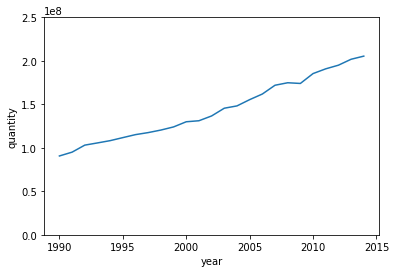

In [59]:
category = 'total_electricity'
df_total_category = df[df['category']==category].groupby(['year']).sum()
sns.lineplot(y=df_total_category['quantity'],x=df_total_category.index)
plt.ylim([0,2.5E8])

Now that we have a list of combinations and what total electriticy consumption looks like, it would be useful to find what the largest category contributors are towards this. As we can see, total electricity makes use of the Kilowatt hours unit, so will be useful to compare towards the other eight options contained within this category.

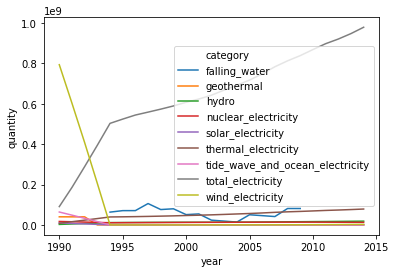

In [60]:
unit = 'Kilowatt-hours, million'
df_total_unit = df[df['unit']==unit].groupby(['category','year']).sum()
df_total_unit = df_total_unit.rolling(5).sum()
df_total_unit
df_total_unit.reset_index(inplace=True)
df_total_unit.head()
sns.lineplot(y=df_total_unit['quantity'],x=df_total_unit['year'],hue=df_total_unit['category'])

From this it's clear that the 'total_electricity' feature includes some other categories contained outside of this unit. I will now attempt the above for each unit contained within the dataset.

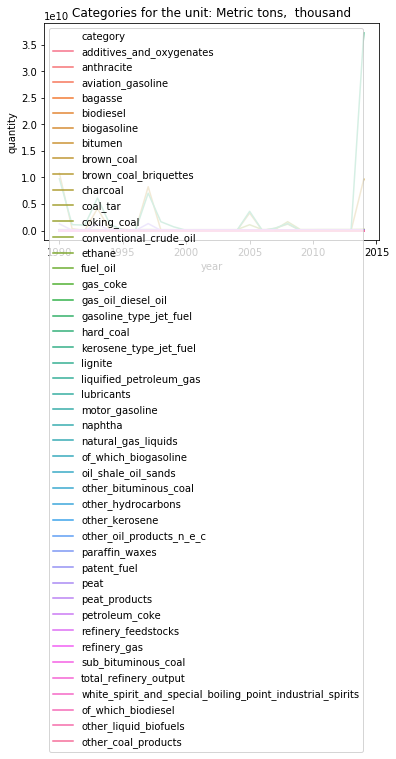

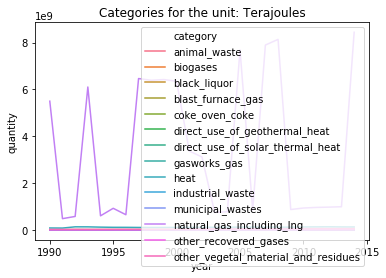

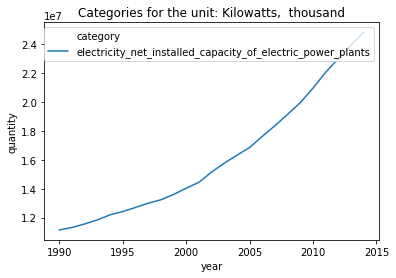

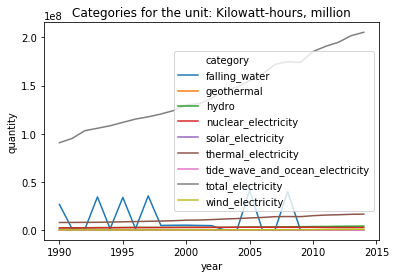

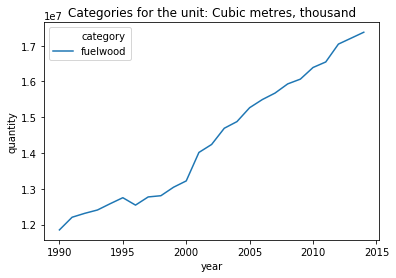

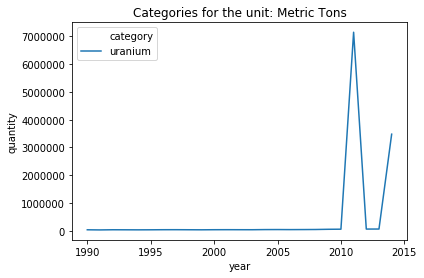

In [61]:
for unit in df['unit'].unique():
    plt.figure()
    df_total_unit = df[df['unit']==unit].groupby(['year','category']).sum()
    df_total_unit.reset_index(inplace=True)
    df_total_unit.head()
    plt.title('Categories for the unit: ' + unit)
    sns.lineplot(y=df_total_unit['quantity'],x=df_total_unit['year'],hue=df_total_unit['category'])
    plt.show()

From the above graphs it is clear that there are a lot of categories which contain very little energy compared to some of their peers, overall I would like to focus on those with the highest totals.

In [62]:
df_top_categories = df.groupby(['category','unit']).sum()
df_top_categories.sort_values(by=['quantity'], inplace=True, ascending=False)
df_top_categories[df_top_categories['quantity']>=1E7]

,,year,quantity
category,unit,,
natural_gas_including_lng,Terajoules,128533658,8.619686e+10
hard_coal,"Metric tons, thousand",84718670,7.170099e+10
brown_coal,"Metric tons, thousand",39506239,3.882408e+10
conventional_crude_oil,"Metric tons, thousand",54763962,6.929002e+09
peat,"Metric tons, thousand",10639569,3.911019e+09
total_electricity,"Kilowatt-hours, million",268214464,3.599469e+09
heat,Terajoules,59429695,2.870173e+09
other_vegetal_material_and_residues,Terajoules,27965801,9.819898e+08
electricity_net_installed_capacity_of_electric_power_plants,"Kilowatts, thousand",100601012,4.054776e+08


We have now found all the categories which hold a total dataset value above 10m in their respective unit. The only possible issue with this is that their unit may not be directly comparable

In [63]:
df_top_categories = df[['category','quantity']].drop(df.index)
print(df_top_categories.head())

Empty DataFrame
Columns: [category, quantity]
Index: []


In [65]:
df_top_categories = df[['category','quantity']].iloc[0:0]
for unit in df['unit'].unique():
    df_single_unit_categories = df[df['unit'] == unit].groupby(['category']).sum()
    df_single_unit_categories.drop(['year'], axis=1, inplace=True)
    df_single_unit_categories.sort_values(by=['quantity'], inplace=True, ascending=False)
    df_single_unit_categories.reset_index(inplace=True)
    df_top_categories = df_top_categories.append(df_single_unit_categories.iloc[0:5],ignore_index=True)
print(df_top_categories)

                                             category      quantity
0                                           hard_coal  7.170099e+10
1                                          brown_coal  3.882408e+10
2                              conventional_crude_oil  6.929002e+09
3                                                peat  3.911019e+09
4                                  gas_oil_diesel_oil  1.922951e+08
5                           natural_gas_including_lng  8.619686e+10
6                                                heat  2.870173e+09
7                 other_vegetal_material_and_residues  9.819898e+08
8                                   blast_furnace_gas  3.629262e+08
9                                      coke_oven_coke  3.159087e+08
10  electricity_net_installed_capacity_of_electric...  4.054776e+08
11                                  total_electricity  3.599469e+09
12                                thermal_electricity  2.838862e+08
13                                      falling_

Now with a list of 17 different categories which represent up to the top 5 from each unit, we can collectively graph these to get a better idea of the total picture.

In [66]:
df_top_units = pd.merge(df_top_categories['category'],df,left_on='category',right_on='category',how='left')
df_top_units.drop(['commodity_transaction'],axis=1,inplace=True)
df_top_units.tail()

,category,country_or_area,year,unit,quantity
571738,uranium,Uzbekistan,2014,Metric Tons,59400.0
571739,uranium,Uzbekistan,2011,Metric Tons,64300.0
571740,uranium,Viet Nam,2011,Metric Tons,1000.0
571741,uranium,Zambia,2011,Metric Tons,9900.0
571742,uranium,Zimbabwe,2011,Metric Tons,1400.0


In [ ]:
print(df.shape)
print(df_top_units.shape)

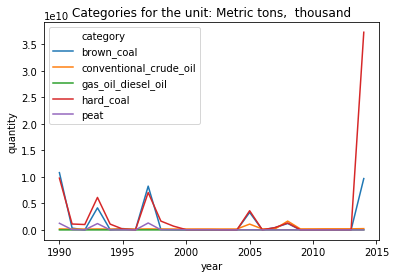

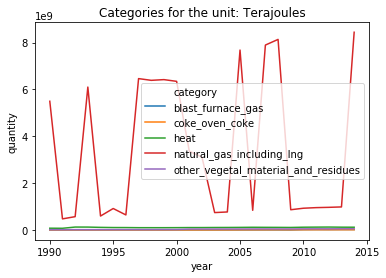

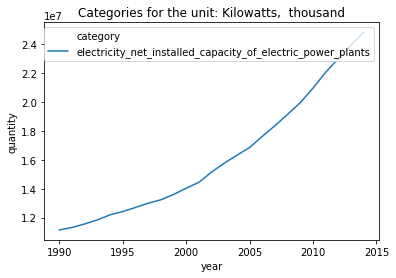

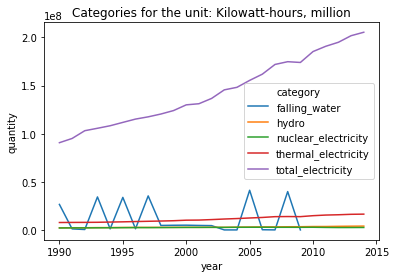

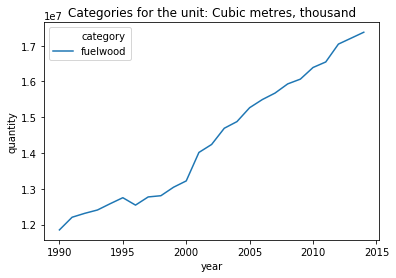

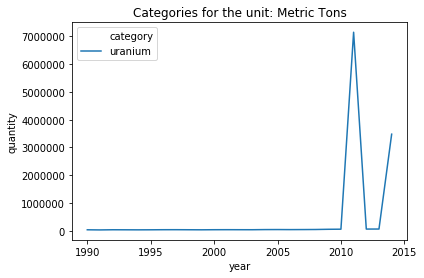

In [67]:
for unit in df_top_units['unit'].unique():
    plt.figure()
    df_total_unit = df_top_units[df_top_units['unit']==unit].groupby(['year','category']).sum()
    df_total_unit.reset_index(inplace=True)
    df_total_unit.head()
    plt.title('Categories for the unit: ' + unit)
    sns.lineplot(y=df_total_unit['quantity'],x=df_total_unit['year'],hue=df_total_unit['category'])
    plt.show()

This still highlights specific categories as being very dominant amongst the others contained in their units.

To change tack slightly, let's compare countries within europe on key categories to see how they changes over the 24 years picutured.

To do this I would like to look at 6 countries,

The United Kingdom, France, Germany, Spain, Italy, and Russia.

In [68]:
df_eu = df[df['country_or_area'].isin(['United Kingdom','France','Germany','Italy','Spain','Ukraine'])]

Now for each countries dataframe I will make a graph showing category trends over time

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

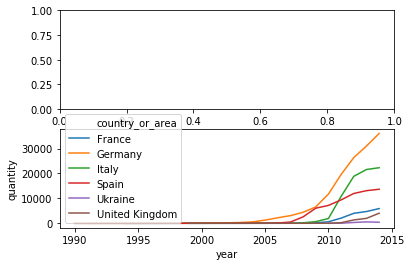

In [74]:
df_eu_solar = df_eu[df_eu['category']=='solar_electricity']
df_eu_wind = df_eu[df_eu['category']=='wind_electricity']
fig, (ax1,ax2) = plt.subplots(2)
ax1 = sns.lineplot(x=df_eu_solar['year'],y=df_eu_solar['quantity'],hue=df_eu_solar['country_or_area'])
ax2 = sns.lineplot(x=df_eu_wind['year'],y=df_eu_wind['quantity'],hue=df_eu_wind['country_or_area'])

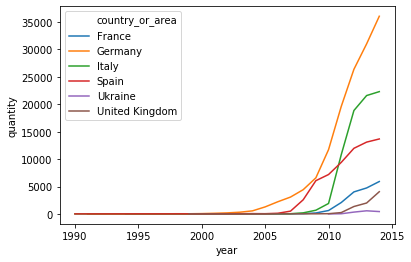

In [70]:
sns.lineplot(x=df_eu_solar['year'],y=df_eu_solar['quantity'],hue=df_eu_solar['country_or_area'])

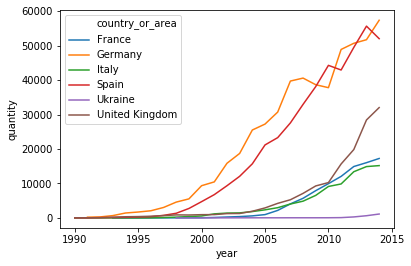

In [71]:
sns.lineplot(x=df_eu_wind['year'],y=df_eu_wind['quantity'],hue=df_eu_wind['country_or_area'])

From these graphs we are able to see the changes to solar and wind production over the 24 year period.

We can gain the following insights:
Germany and Italy have proven to be the most effective at adopting solar and Germany and Spain at wind.
France and the UK have been comparatively slow adopters of both.
Despite this the UK made major improvements to wind generation over the first four years of the 2010's as expected.

It's my understanding that France utilizes a significant amount of nuclear, let's test this hypothesis.

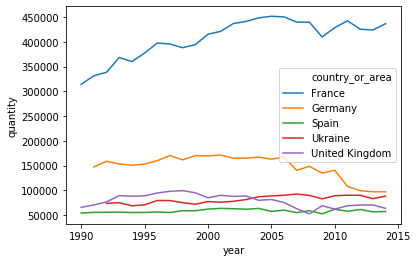

In [72]:
df_eu_nuclear = df_eu[df_eu['category']=='nuclear_electricity']
sns.lineplot(x=df_eu_nuclear['year'],y=df_eu_nuclear['quantity'],hue=df_eu_nuclear['country_or_area'])

From this it's clear that while France has a far lower level of renewable energy, they do have a very large amount of nuclear energy, helping to reduce their carbon footprint further.

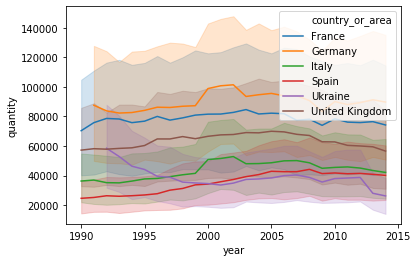

In [73]:
df_eu_total = df_eu[df_eu['category']=='total_electricity']
sns.lineplot(x=df_eu_total['year'],y=df_eu_total['quantity'],hue=df_eu_total['country_or_area'])